In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import matplotlib.pyplot as plt

In [4]:
metric_scores = pd.read_csv(os.path.expanduser('~/SSS_mount/insituCNV/InSituCNV/Figure2/04_Compare_results_using_metrics/metrics_cnv_inference_across_counts_aug.csv'), index_col=0)

In [5]:
metric_scores.head()

,type_of_sampling,experiment,n_genes,n_counts,mean_countsxcell,nmi,ari,F1score_all,F1score_gain,F1score_loss,AUC_loss,PR_gains,AUC_loss.1,PR_loss,AUC_gains,n_subsample
0,subsampled,2,all,NaN,37548.426,0.989037,0.994521,0.877638,0.926463,0.738526,0.802684,0.835405,0.802684,0.320777,0.946252,100
1,subsampled,2,all,NaN,26283.896,0.963123,0.980532,0.875936,0.935707,0.698483,0.777539,0.858059,0.777539,0.304747,0.953806,70
2,subsampled,2,20000,NaN,19431.750,0.970034,0.984270,0.872018,0.935318,0.663652,0.757331,0.850679,0.757331,0.230927,0.953979,70
3,subsampled,2,all,NaN,18774.213,0.981066,0.990463,0.868525,0.935615,0.661650,0.754803,0.858554,0.754803,0.263352,0.953388,50
4,subsampled,2,15000,NaN,9902.858,0.955868,0.977226,0.849958,0.928288,0.556970,0.702198,0.841398,0.702198,0.073697,0.947964,50


In [7]:
metric_scores = pd.read_csv(os.path.expanduser('~/SSS_mount/insituCNV/InSituCNV/Figure2/04_Compare_results_using_metrics/metrics_cnv_inference_across_counts.csv'), index_col=0)
metric_scores.head()

,type_of_sampling,number,n_genes,mean_countsxcell,nmi,ari,F1score_all,F1score_gain,F1score_loss,ROC_gains,PR_gains,ROC_loss,PR_loss
5,counts,1.0,25691,370.47476,0.142730,0.138379,0.570136,0.745353,0.000000,0.797720,0.141274,0.516716,0.001859
4,counts,5.0,25691,1852.37460,0.486211,0.536215,0.674683,0.862160,0.030624,0.892132,0.501135,0.518027,0.001855
3,counts,10.0,25691,3704.75000,0.685550,0.634274,0.713010,0.877506,0.182385,0.906760,0.628777,0.556952,0.003039
2,counts,20.0,25691,7409.50000,0.795845,0.843010,0.785700,0.894188,0.485729,0.922307,0.690137,0.665035,0.020321
1,counts,50.0,25691,18523.75000,0.919954,0.950559,0.833743,0.899521,0.674899,0.928056,0.716165,0.763470,0.120775


In [8]:
metric_scores.shape

(7, 13)

In [12]:
metric_scores['Read Depth Fraction'] = metric_scores['n_subsample'].astype(int)
metric_scores['Gene Panel Size'] = metric_scores['n_genes'].astype(str)

In [43]:
for exp in metric_scores['experiment'].unique():
    # Read in metric scores and counts/cell
    total_counts_mean_matrix = pd.read_csv(os.path.expanduser(f'~/SSS_mount/insituCNV/InSituCNV/Figure2/05_Visualize_results/sim0{exp}_total_counts_mean_matrix.csv'), index_col=0)
    metric_scores_s = metric_scores[metric_scores['experiment']==exp]


    counts_df = total_counts_mean_matrix.stack().reset_index()
    counts_df.columns = ['Gene Panel Size', 'Read Depth Fraction', 'Total Counts per Cell']
    counts_df['Gene Panel Size'] = counts_df['Gene Panel Size'].astype(str)
    counts_df['Read Depth Fraction'] = counts_df['Read Depth Fraction'].astype(int)

    # Merge based on Gene Panel + Read Depth
    merged_df = pd.merge(counts_df, metric_scores_s, on=['Gene Panel Size', 'Read Depth Fraction'])
    merged_df.to_csv(f'sim0{exp}_metric_plot.csv')

/tmp/ipykernel_2870717/1499844436.py:59: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/1499844436.py:59: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/1499844436.py:59: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/1499844436.py:59: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/1499844436.py:59: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/1499844436.py:59: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/1499844436.py:59: UserWarning: Attempt to set non-positive 

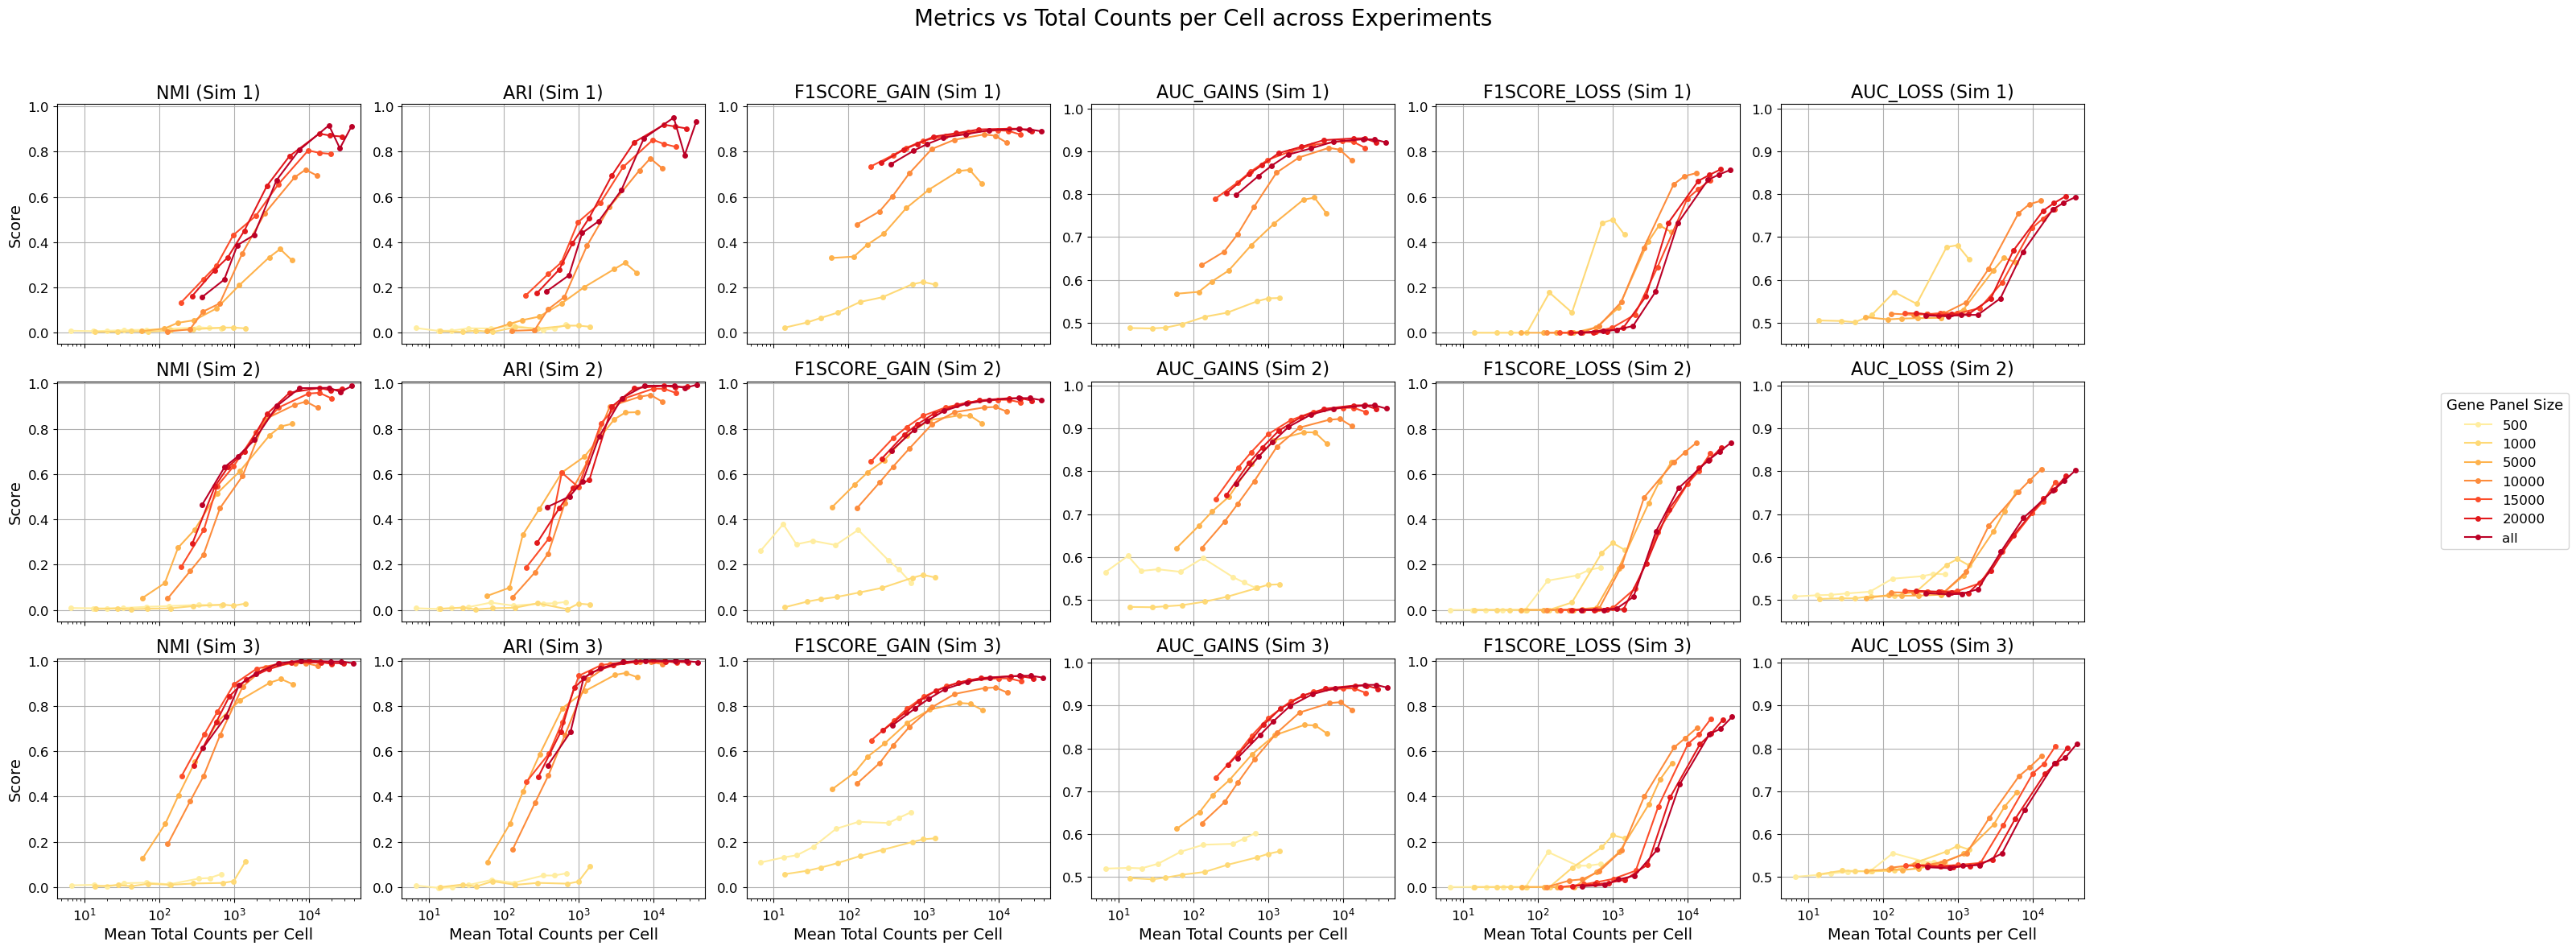

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define parameters
panel_order = ['500', '1000', '5000', '10000', '15000', '20000', 'all']
colors = sns.color_palette("YlOrRd", n_colors=len(panel_order))
experiments = [1,2,3]
metrics = ['nmi', 'ari', 'F1score_gain', 'AUC_gains', 'F1score_loss', 'AUC_loss']


#could you plot them in this order instead?
metric_order = [nmi, ari, nmi, ari, nmi, ari],
                ['F1score_gain (sim1)', 'AUC_gains','F1score_gain(sim2)', 'AUC_gains','F1score_gain(sim3)', 'AUC_gains',]
            ['F1score_loss', 'AUC_loss','F1score_loss', 'AUC_loss','F1score_loss', 'AUC_loss']


# Axis ranges per metric
y_ranges = {
    'nmi': (-.05, 1.01),
    'ari': (-.05, 1.01),
    'F1score_gain': (-.05, 1.01),
    'F1score_loss': (-.05, 1.01),
    'AUC_gains': (0.45, 1.01),
    'AUC_loss': (0.45, 1.01)
}

# Global x-axis range
x_min = 0
x_max = merged_df['Total Counts per Cell'].max() + 10000

# Create subplot grid
fig, axes = plt.subplots(len(experiments), len(metrics), figsize=(5 * len(metrics), 4 * len(experiments)), sharex=True)

# Handle single row/column edge case
if len(experiments) == 1:
    axes = axes[None, :]
if len(metrics) == 1:
    axes = axes[:, None]

for i, exp in enumerate(experiments):
    for j, met in enumerate(metrics):
        ax = axes[i][j]
        merged_df = pd.read_csv(os.path.expanduser(f'~/SSS_mount/insituCNV/InSituCNV/Figure2/05_Visualize_results/sim0{exp}_metric_plot.csv'), index_col=0)
        plot_data = merged_df[merged_df['experiment'] == exp].copy()

        plot_data['Gene Panel Size'] = plot_data['Gene Panel Size'].astype(str)
        plot_data = plot_data[plot_data['Gene Panel Size'].isin(panel_order)]
        plot_data['Gene Panel Size'] = pd.Categorical(plot_data['Gene Panel Size'], categories=panel_order, ordered=True)
        plot_data = plot_data.sort_values(by=['Gene Panel Size', 'Total Counts per Cell'])

        for k, panel in enumerate(panel_order):
            subset = plot_data[plot_data['Gene Panel Size'] == panel]
            if not subset.empty:
                ax.plot(
                    subset['Total Counts per Cell'],
                    subset[met],
                    label=panel,
                    marker='o',
                    markersize=4,
                    linewidth=1.5,
                    color=colors[k]
                )

        ax.set_xscale("log")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_ranges.get(met, (-0.05, 1.01)))
        ax.set_title(f"{met.upper()} (Sim {exp})", fontsize=16)

        if i == len(experiments) - 1:
            ax.set_xlabel("Mean Total Counts per Cell", fontsize=14)
        if j == 0:
            ax.set_ylabel("Score", fontsize=14)

        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True)

# Create one shared legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Gene Panel Size", bbox_to_anchor=(1.01, 0.5), loc="center left", fontsize=12, title_fontsize=13)

# Overall title and layout
fig.suptitle("Metrics vs Total Counts per Cell across Experiments", fontsize=20)
plt.tight_layout(rect=[0, 0, 0.87, 0.95])  # Leave space for legend and title
# plt.savefig("combined_metrics_vs_counts_all.pdf")
plt.show()


/tmp/ipykernel_2870717/2588986598.py:73: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/2588986598.py:73: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/2588986598.py:73: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/2588986598.py:73: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/2588986598.py:73: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/2588986598.py:73: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min, x_max)
/tmp/ipykernel_2870717/2588986598.py:73: UserWarning: Attempt to set non-positive 

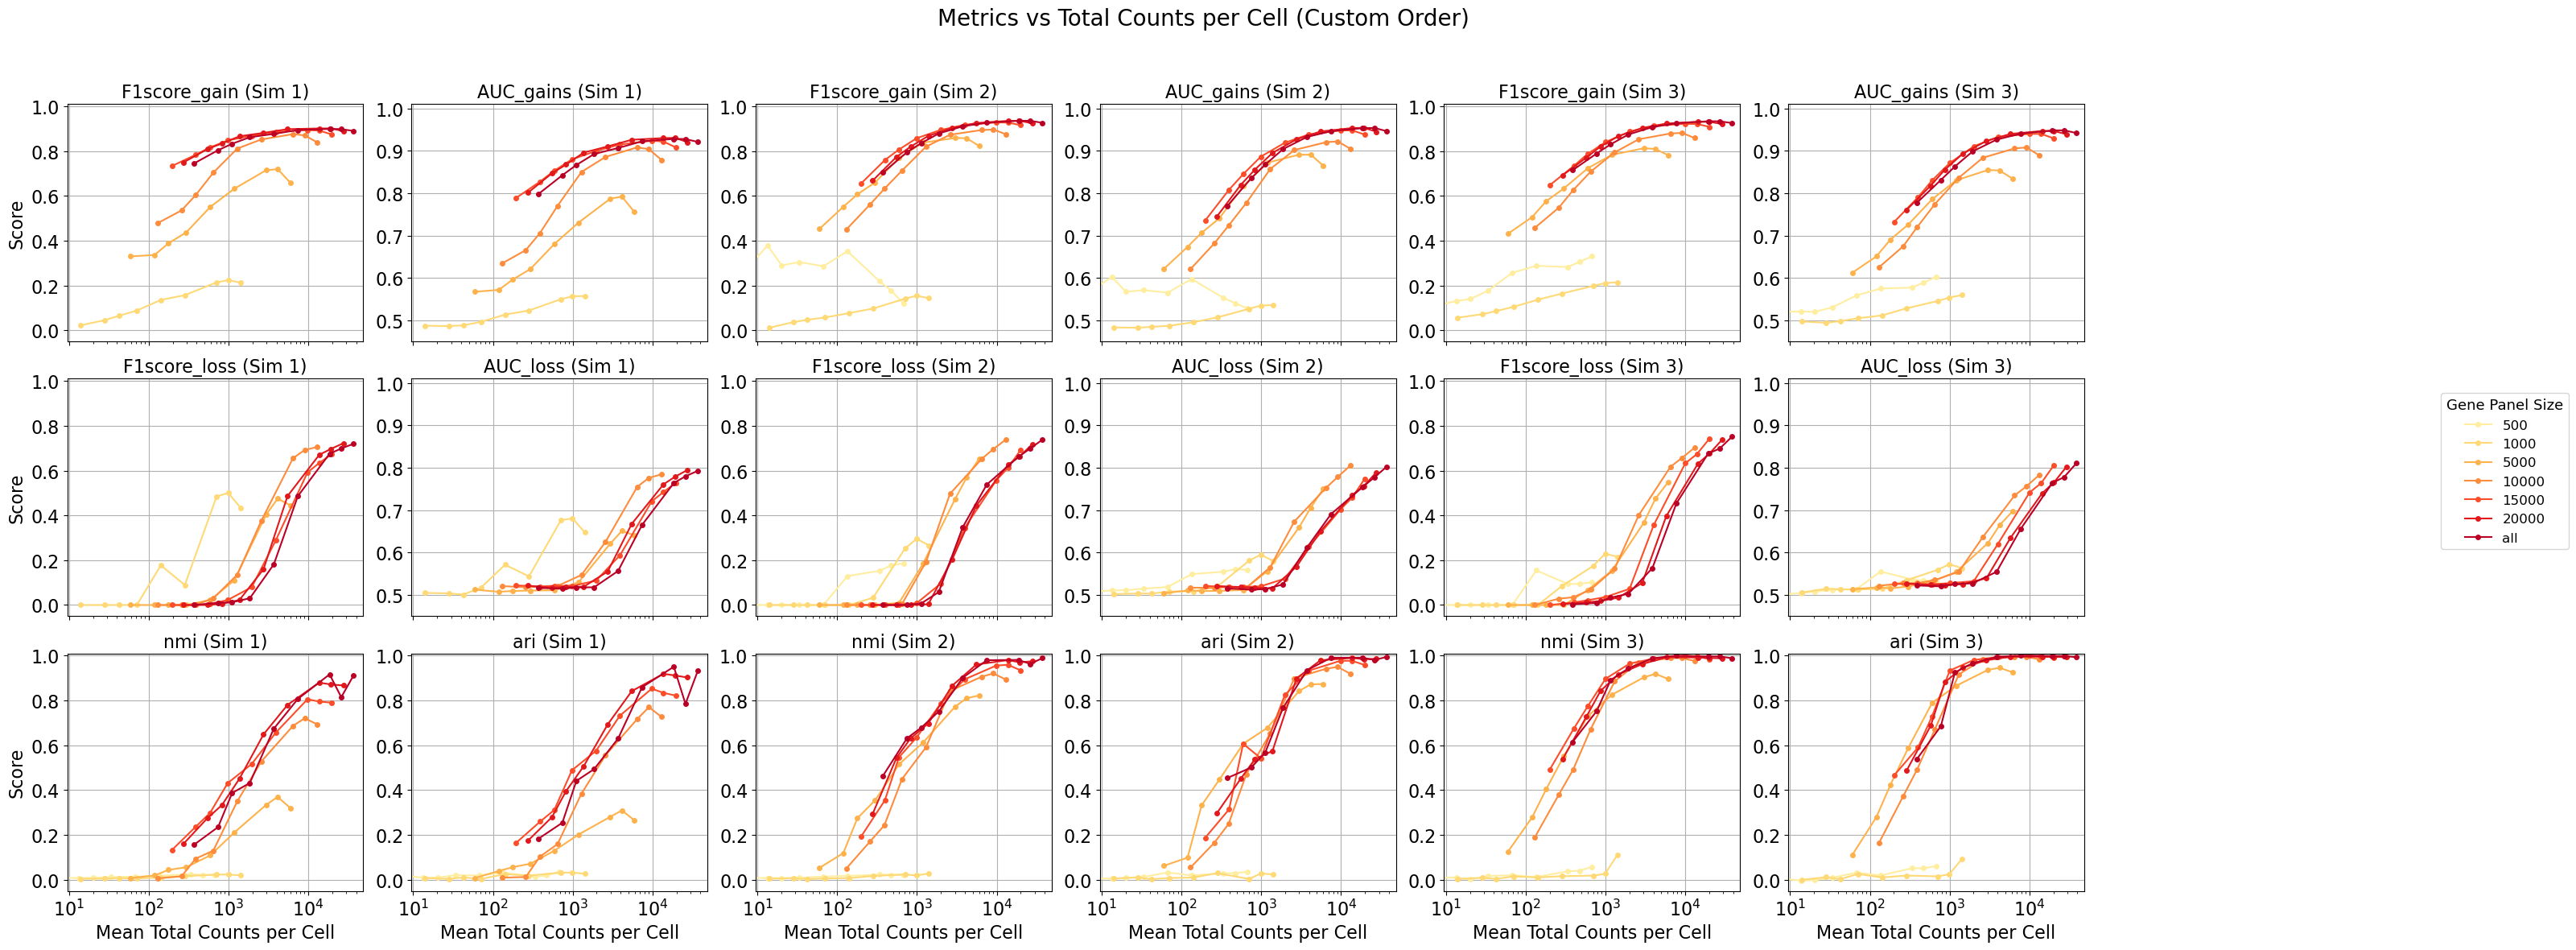

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Define parameters
panel_order = ['500', '1000', '5000', '10000', '15000', '20000', 'all']
colors = sns.color_palette("YlOrRd", n_colors=len(panel_order))

# Define your custom plotting order here
custom_plot_order = [
    (1, 'F1score_gain'), (1, 'AUC_gains'), (2, 'F1score_gain'), (2, 'AUC_gains'),  (3, 'F1score_gain'), (3, 'AUC_gains'),
    (1, 'F1score_loss'), (1, 'AUC_loss'),(2, 'F1score_loss'), (2, 'AUC_loss'), (3, 'F1score_loss'), (3, 'AUC_loss'),
    (1, 'nmi'), (1, 'ari'), (2, 'nmi'), (2, 'ari'),(3, 'nmi'), (3, 'ari') ,
]

# Axis ranges per metric
y_ranges = {
    'nmi': (-.05, 1.01),
    'ari': (-.05, 1.01),
    'F1score_gain': (-.05, 1.01),
    'F1score_loss': (-.05, 1.01),
    'AUC_gains': (0.45, 1.01),
    'AUC_loss': (0.45, 1.01)
}

# Load all data in advance
experiment_dfs = {}
for exp in [1, 2, 3]:
    df = pd.read_csv(
        os.path.expanduser(f'~/SSS_mount/insituCNV/InSituCNV/Figure2/05_Visualize_results/sim0{exp}_metric_plot.csv'),
        index_col=0
    )
    experiment_dfs[exp] = df

# Set global x-axis range
x_min = 0
x_max = max(df['Total Counts per Cell'].max() for df in experiment_dfs.values()) + 10000

# Set up figure grid
ncols = 6  # one row
nrows = 3  # three experiments, or group how you like
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4), sharex=True)

# Flatten axes for easy looping
axes = axes.flatten()

# Plot
for idx, (exp, metric) in enumerate(custom_plot_order):
    ax = axes[idx]
    df = experiment_dfs[exp]
    plot_data = df[df['experiment'] == exp].copy()

    plot_data['Gene Panel Size'] = plot_data['Gene Panel Size'].astype(str)
    plot_data = plot_data[plot_data['Gene Panel Size'].isin(panel_order)]
    plot_data['Gene Panel Size'] = pd.Categorical(plot_data['Gene Panel Size'], categories=panel_order, ordered=True)
    plot_data = plot_data.sort_values(by=['Gene Panel Size', 'Total Counts per Cell'])

    for k, panel in enumerate(panel_order):
        subset = plot_data[plot_data['Gene Panel Size'] == panel]
        if not subset.empty:
            ax.plot(
                subset['Total Counts per Cell'],
                subset[metric],
                label=panel,
                marker='o',
                markersize=4,
                linewidth=1.5,
                color=colors[k]
            )

    ax.set_xscale("log")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_ranges.get(metric, (-0.05, 1.01)))
    ax.set_title(f"{metric} (Sim {exp})", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)

    if idx >= len(custom_plot_order) - ncols:
        ax.set_xlabel("Mean Total Counts per Cell", fontsize=16)
    if idx % ncols == 0:
        ax.set_ylabel("Score", fontsize=16)

# Add one shared legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Gene Panel Size", bbox_to_anchor=(1.01, 0.5), loc="center left", fontsize=12, title_fontsize=13)

fig.suptitle("Metrics vs Total Counts per Cell (Custom Order)", fontsize=20)
plt.tight_layout(rect=[0, 0, 0.87, 0.95])
plt.savefig("custom_order_metrics_vs_counts_all.pdf")
plt.show()

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


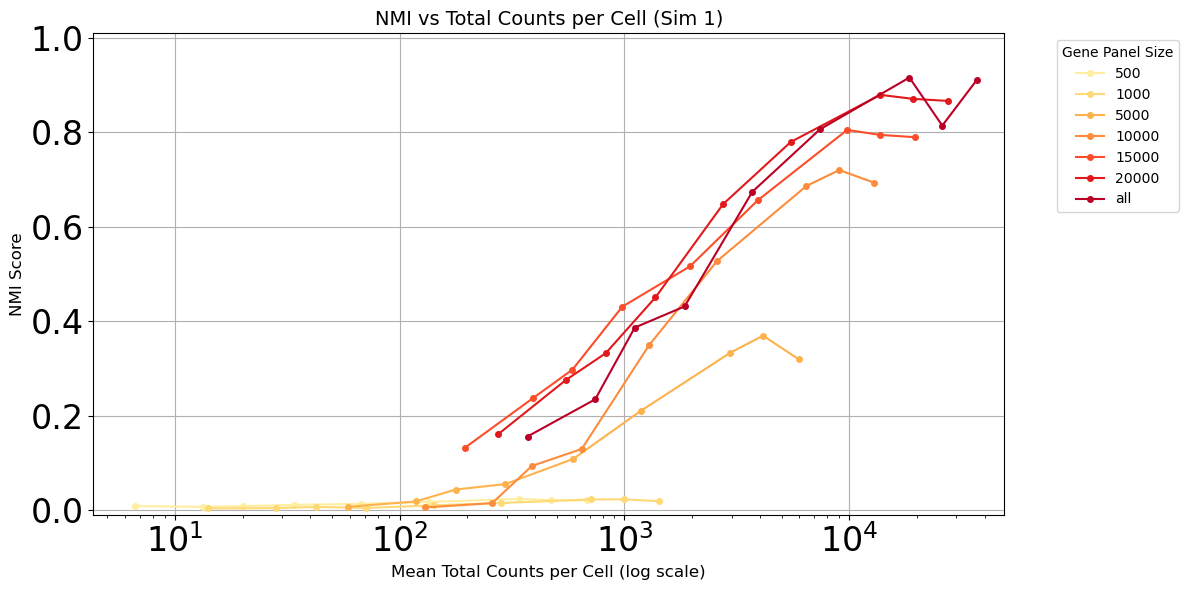

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


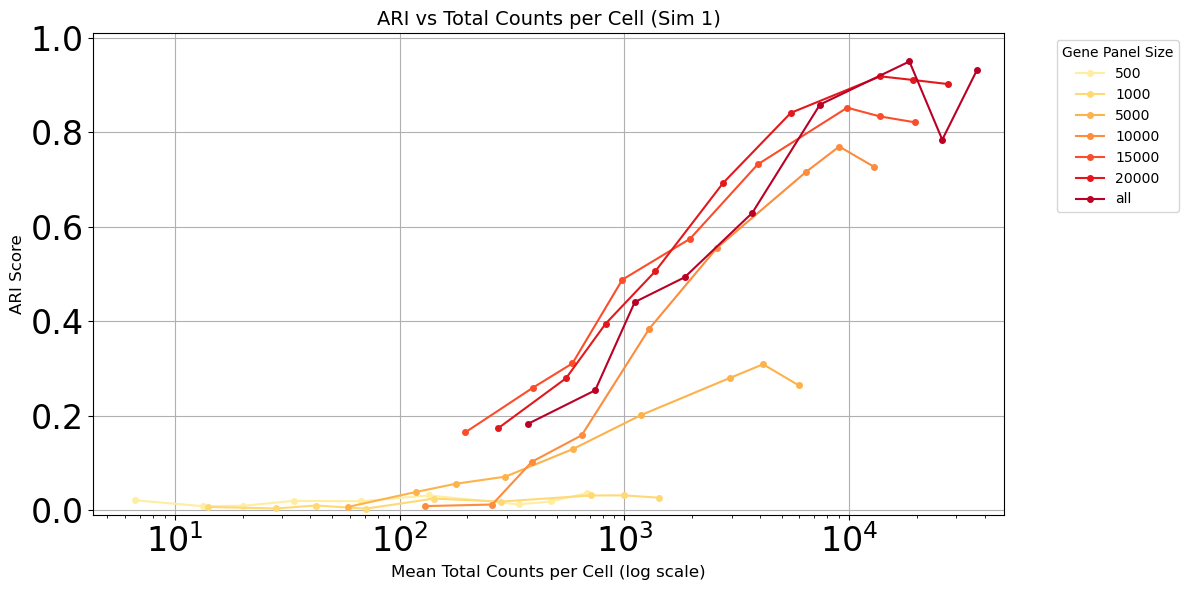

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


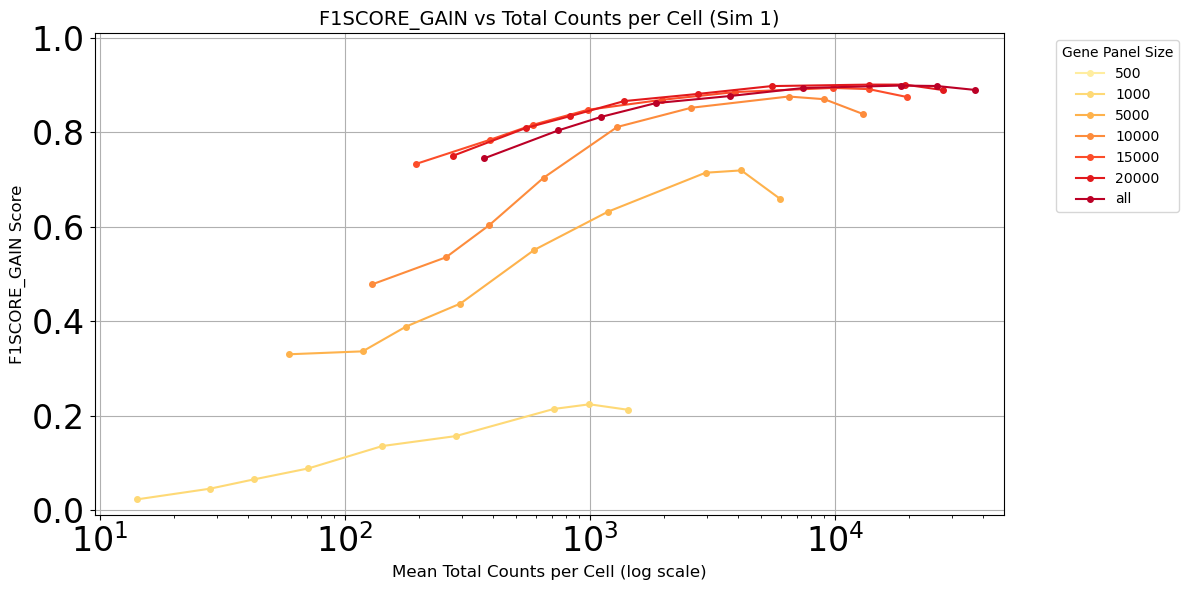

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


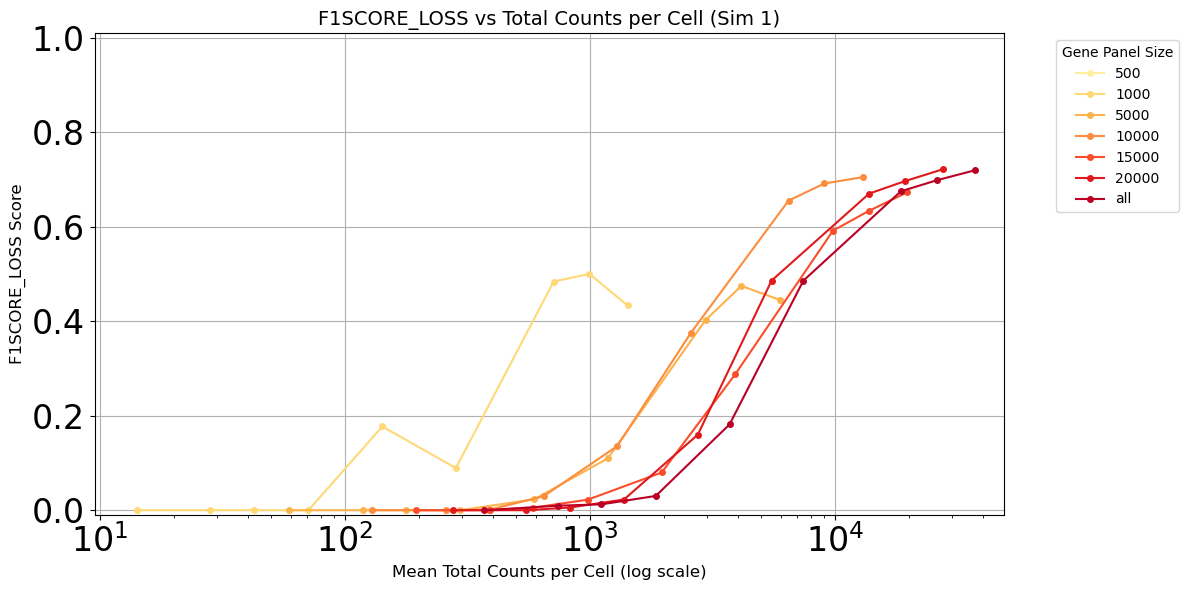

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


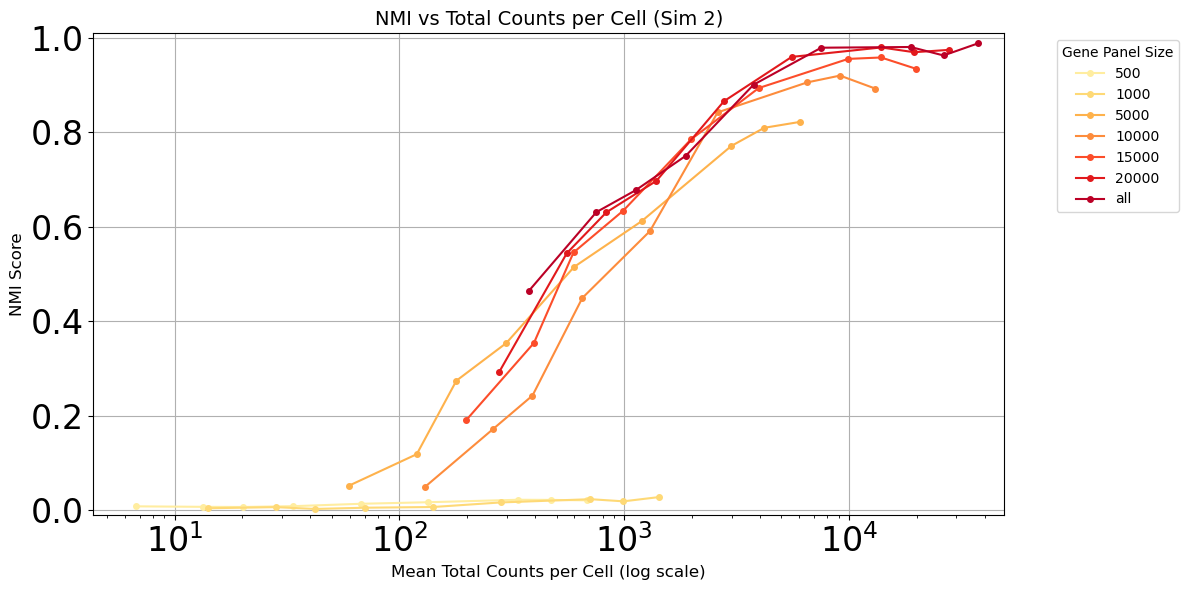

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


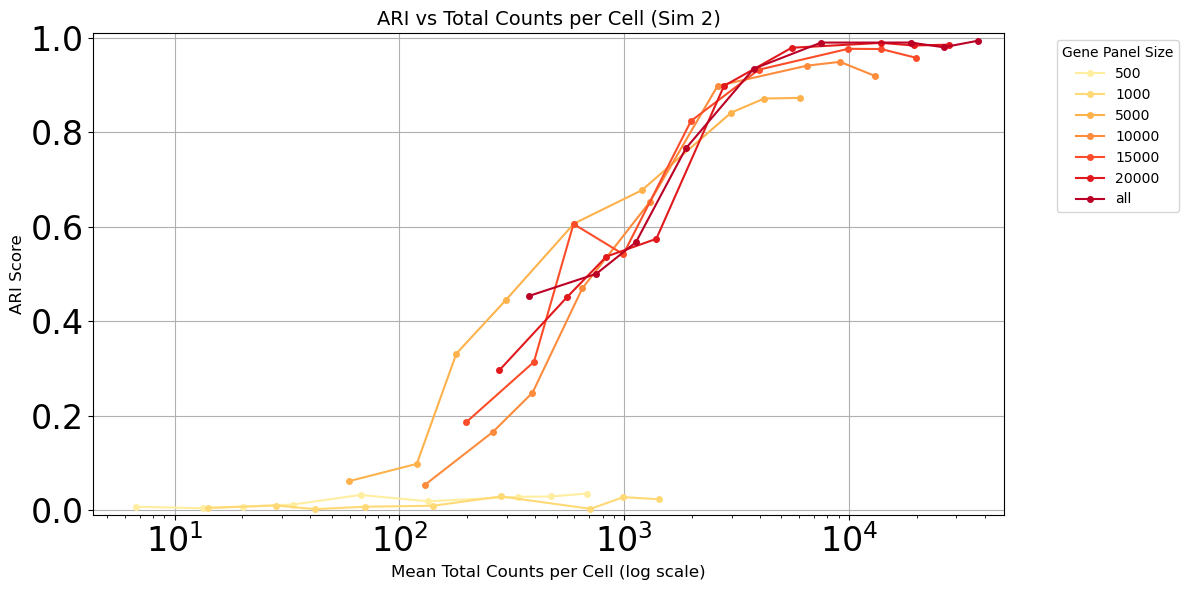

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


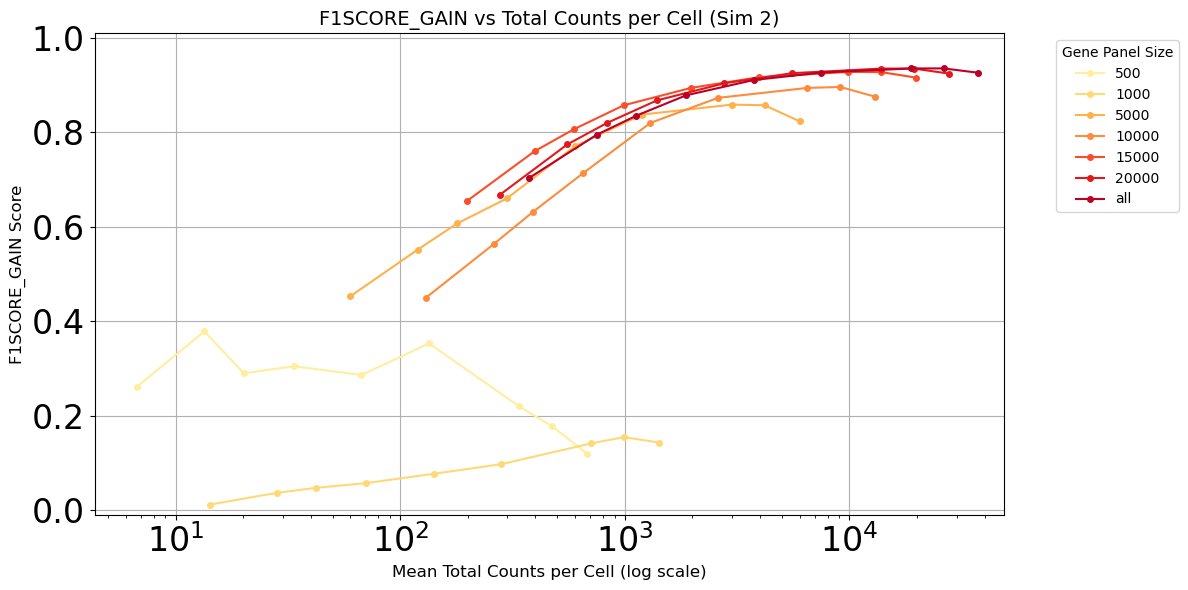

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


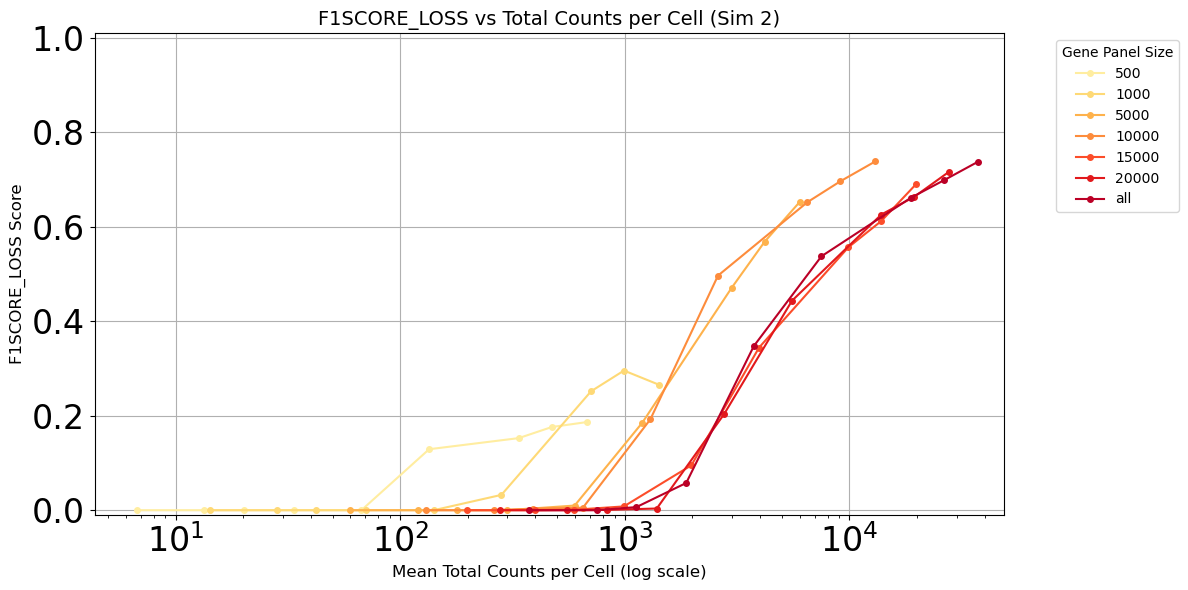

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


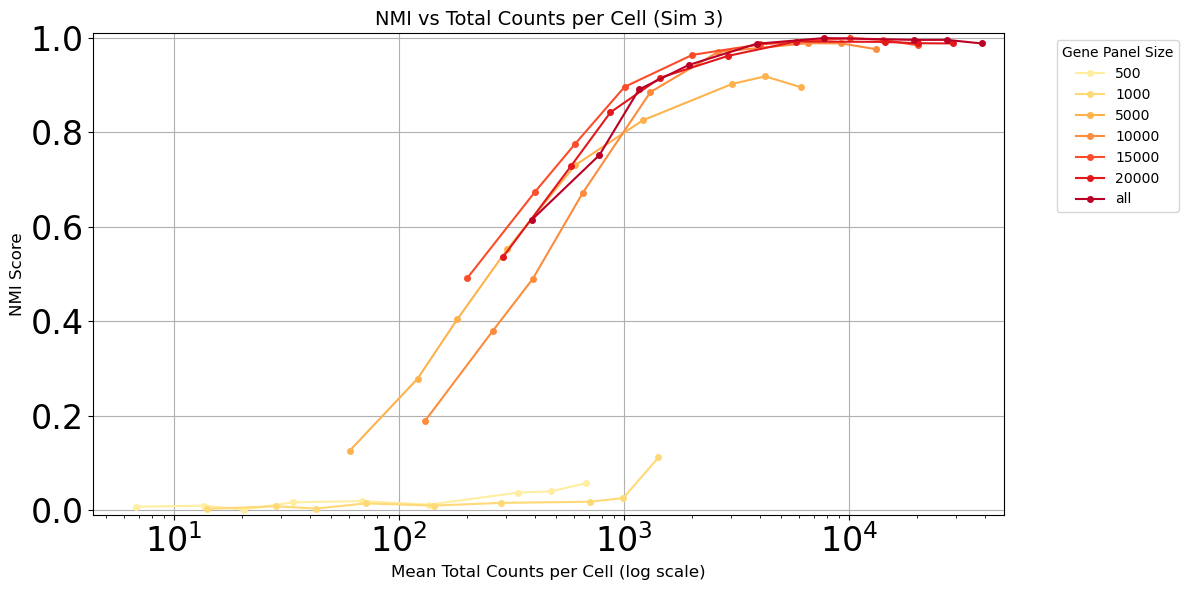

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


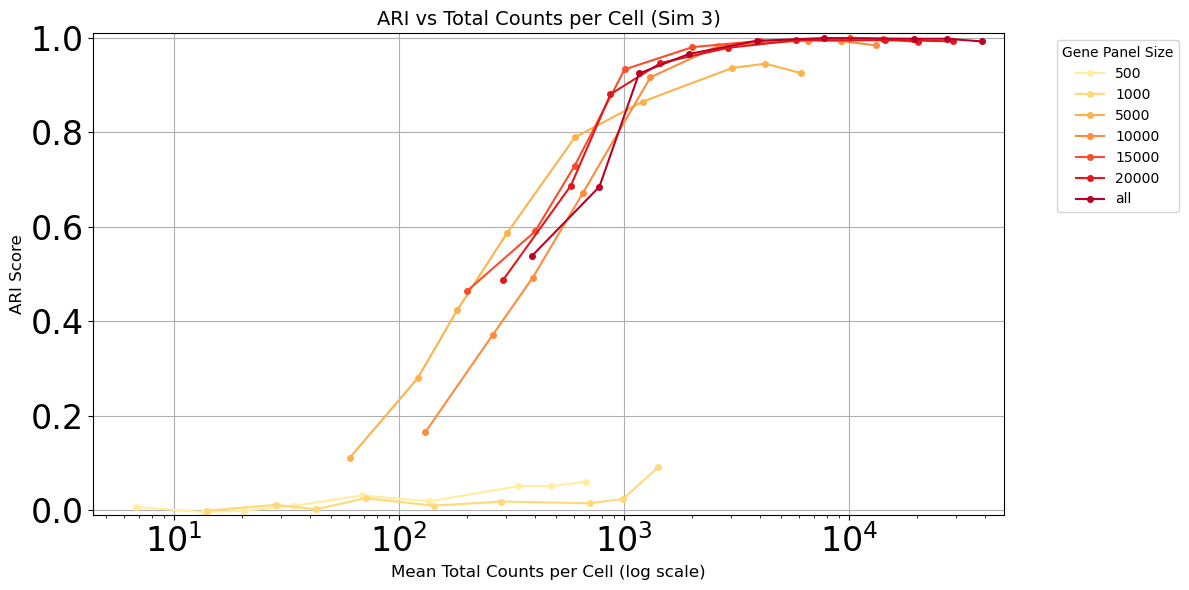

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


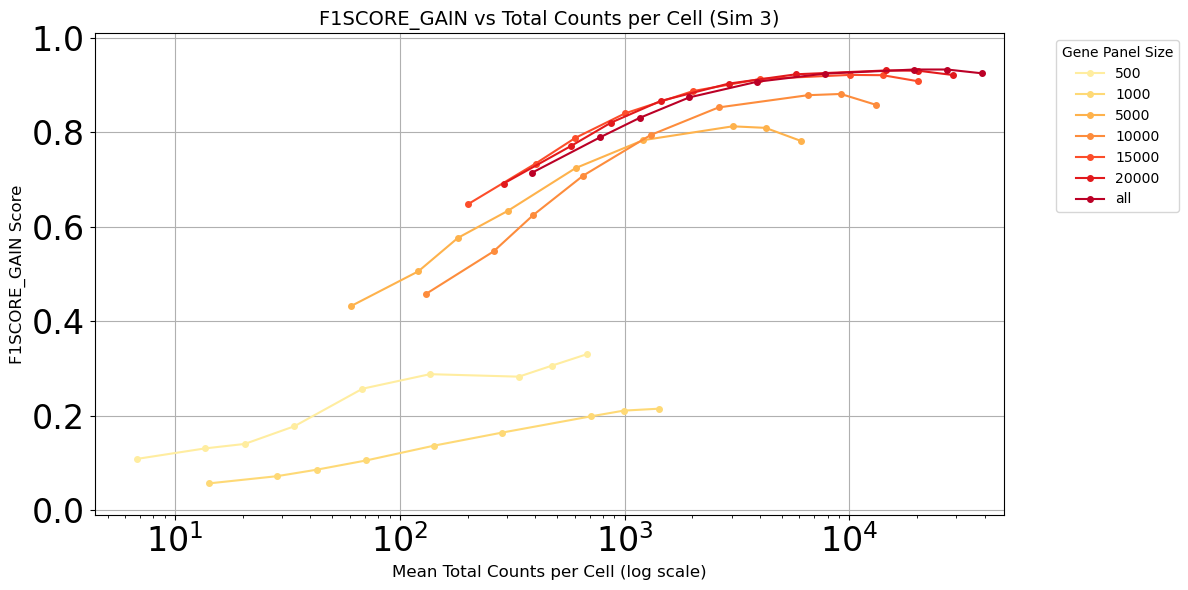

/tmp/ipykernel_2870717/3440277171.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(x_min, x_max)


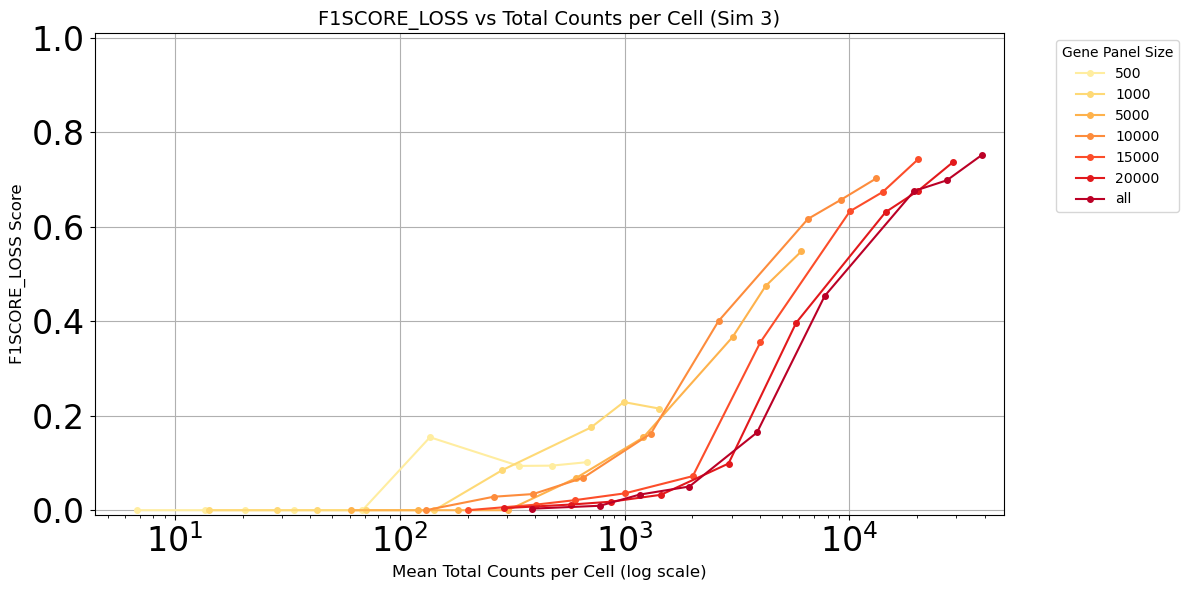

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Set fixed gene panel order and color palette
panel_order = ['500', '1000', '5000', '10000', '15000', '20000', 'all']
colors = sns.color_palette("YlOrRd", n_colors=len(panel_order))

experiments = [1, 2, 3]
metrics = ['nmi','ari','F1score_gain','F1score_loss']#,'AUC_gains','AUC_loss']

# Global min/max for axes
y_min = -0.01
y_max = 1.01
x_min = 0
x_max = merged_df['Total Counts per Cell'].max() + 10000

for exp in experiments:
    merged_df = pd.read_csv(os.path.expanduser(f'~/SSS_mount/insituCNV/InSituCNV/Figure2/05_Visualize_results/sim0{exp}_metric_plot.csv'), index_col=0)
    for met in metrics:
        plot_data = merged_df[merged_df['experiment'] == exp].copy()

        # Ensure correct panel order
        plot_data['Gene Panel Size'] = plot_data['Gene Panel Size'].astype(str)
        plot_data = plot_data[plot_data['Gene Panel Size'].isin(panel_order)]
        plot_data['Gene Panel Size'] = pd.Categorical(plot_data['Gene Panel Size'], categories=panel_order, ordered=True)
        plot_data = plot_data.sort_values(by=['Gene Panel Size', 'Total Counts per Cell'])

        plt.figure(figsize=(12, 6))

        for i, panel in enumerate(panel_order):
            subset = plot_data[plot_data['Gene Panel Size'] == panel]
            if subset.empty:
                continue

            plt.plot(
                subset['Total Counts per Cell'],
                subset[met],
                label=panel,
                marker='o',
                markersize=4,
                linewidth=1.5,
                color=colors[i]
            )

        plt.xscale("log")
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xlabel("Mean Total Counts per Cell (log scale)", fontsize=12)
        plt.ylabel(f"{met.upper()} Score", fontsize=12)
        plt.title(f"{met.upper()} vs Total Counts per Cell (Sim {exp})", fontsize=14)
        plt.legend(title="Gene Panel Size", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tick_params(axis='both', labelsize=24)
        plt.tight_layout()
        plt.savefig(f"sim0{exp}_metric_{met}_vs_counts.pdf")
        plt.show()
        plt.close()


**Example:**

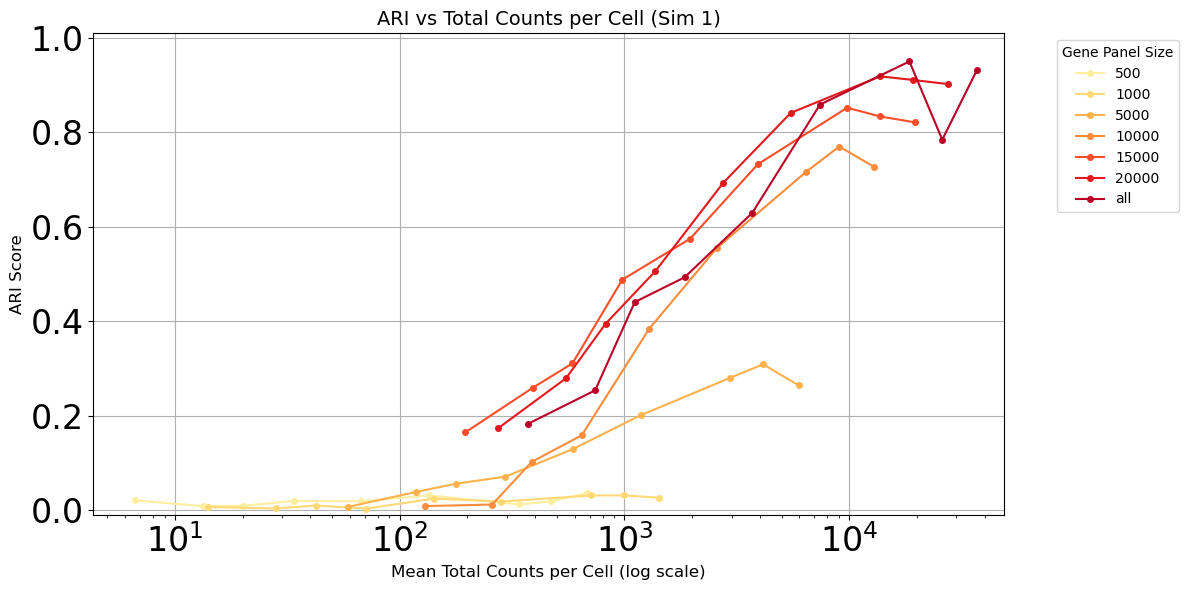